In [17]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# hyperparameters
input_size = 1
output_size = 1
epochs = 10
learning_rate = 1e-3

In [13]:
# toy data
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [23]:
model = torch.nn.Linear(input_size, output_size)
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [26]:
loss_arr = []
for epoch in range(epochs):
    i = torch.from_numpy(x_train)
    t = torch.from_numpy(y_train)
    
    # Forward
    output = model(i)
    loss = loss_fn(output, t)
    loss_arr.append(loss)
    
    # Backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

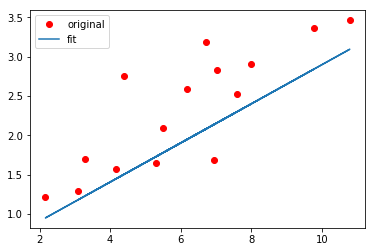

In [27]:
prediction = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label="original")
plt.plot(x_train, prediction, label='fit')
plt.legend()
plt.show()

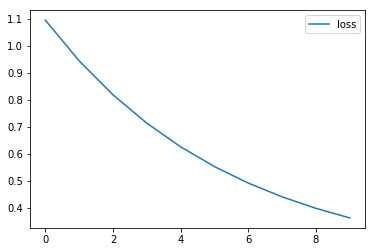

In [28]:
plt.plot(loss_arr, label="loss")
plt.legend()
plt.show()